**Data dictionary**

<font color='blue'><b>- Features V1, V2, … V28 : principal components obtained with PCA due to confidentiality <br>
<font color='blue'><b>- Time : contains the seconds elapsed between each transaction and the first transaction in the dataset<br> 
<font color='blue'><b>- Amount: transaction Amount <br> 
<font color='blue'><b>- Class: 1 in case of fraud and 0 otherwise

**Importing basic libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Read data**

In [ ]:
df = pd.read_csv('BankOfAmerica.csv')

### 1. Getting familiar with the data

**Peak the data frame**

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Data frame info**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Basic stats descriptive statistics (mean, median, min, max, standard deviation) for each field**

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Check for missing values**

In [ ]:
df.isnull().sum().sum()

0

<AxesSubplot:>

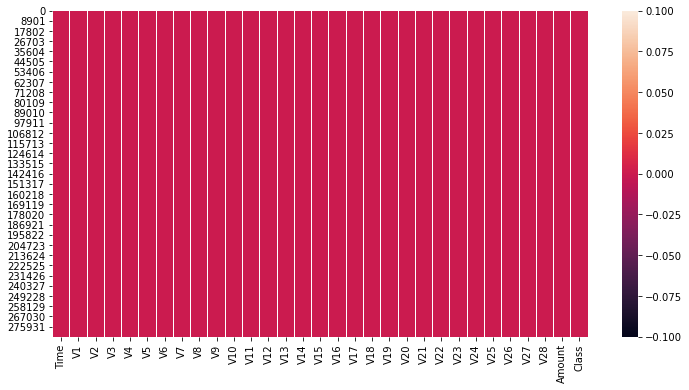

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

<font color='red'><b> What is your initial take on the dataset and it's completeness?

<font color='green'><b> There are no missing values.

### 2. Exploratory Data Analysis

**Check out how many credit card frauds there were**

In [ ]:
print("There are {} normal transactions.".format(len(df[df['Class'] == 0])))

There are 284315 normal transactions.


In [ ]:
print("There are {} fraudulent transactions.".format(len(df[df['Class'] == 1])))

There are 492 fraudulent transactions.


Text(0, 0.5, 'Count')

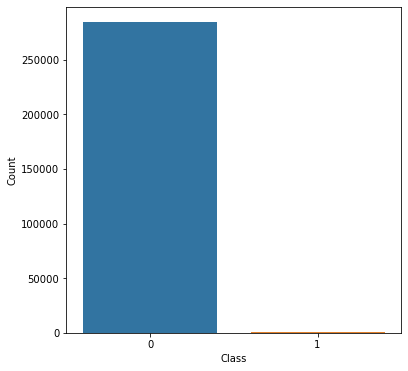

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['Class'])
plt.xlabel('Class')
plt.ylabel('Count')

<font color='red'><b> Do the classes look balanced? Could this be a class imbalance problem? Do your research on class imbalance in supervised learning, it's implications to modeling and methods to tackle

In [ ]:
len(df[df['Class'] == 1])/len(df)

0.001727485630620034

<font color='green'><b> Extremely imbalanced. Yes.

<font color='green'><b> <u>Class imbalance</u>: number of samples of one or more groups is far less than the other groups in a classification problem. <br>
<u>Implications</u>: the machine learning classifier will be biased towards the majority group, causing inaccuracy in minority group prediction. <br>
<u>Methods</u>: 
- Oversample minority class
- Undersample majoity class
- Generate synthetic samples
    - SMOTE
    - ADASYN
- Different algorithms
    - Support Vector Machines
    - Tree-Based algorithms

Reference: https://towardsdatascience.com/class-imbalance-a-classification-headache-1939297ff4a4

<font color='red'><b>What other EDA's can you think of doing? Try 1 or 2 below.

<AxesSubplot:>

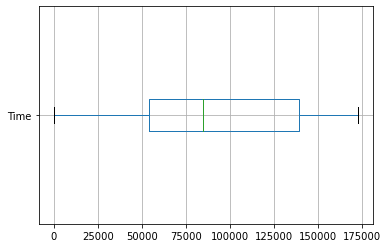

In [ ]:
df[['Time']].plot.box(vert = False, grid = True)

<AxesSubplot:title={'center':'Amount Distribution'}, ylabel='Frequency'>

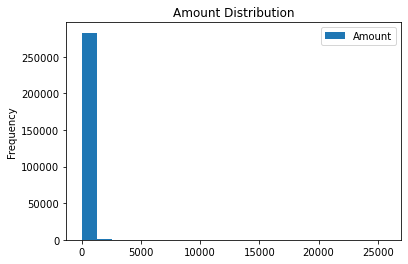

In [ ]:
df[['Amount']].plot.hist(bins = 20, title = 'Amount Distribution', range = [0, max(df['Amount'])])

<AxesSubplot:title={'center':'Amount Distribution'}, ylabel='Density'>

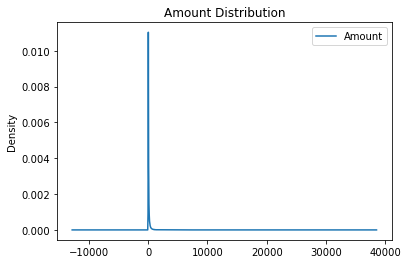

In [ ]:
df[['Amount']].plot.kde(title = 'Amount Distribution')

**Let's look at the imbalance in more detail**

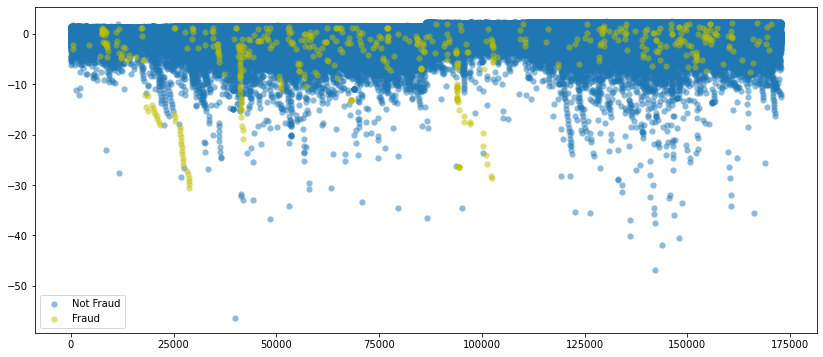

In [ ]:
def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Not Fraud", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Fraud", alpha=0.5, linewidth=0.15, c='y')
    plt.legend()
    return plt.show()

from sklearn.model_selection import train_test_split
y = df.iloc[:,-1].values
X = df.iloc[:, :-1].values

plt.figure(figsize=(14,6))
plot_data(X, y)

<font color='orange'><b> The frauds in general look normally distributed; is that because of fraudsters track its distribution?<br>
    Additionally, the trails of vertical lines do invite suspision. 

**There is clear imbalance. Let's look at SMOTE which is a popular method to tackle class imbalances**

**More information of SMOTE can be found here: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html**

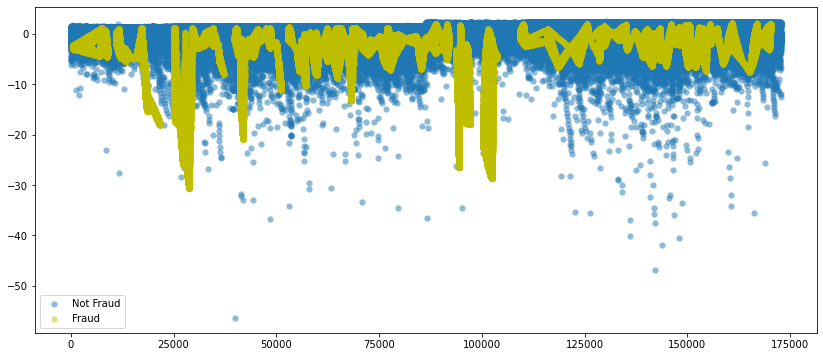

In [ ]:
from imblearn.over_sampling import SMOTE

method = SMOTE(random_state=42, sampling_strategy=0.6)

X_resampled, y_resampled = method.fit_resample(X, y)

plt.figure(figsize=(14,6))
plot_data(X_resampled, y_resampled)

In [ ]:
len(X_resampled)

454904

In [ ]:
len(y_resampled)

454904

In [ ]:
len(X)

284807

In [ ]:
len(y)

284807

Text(0, 0.5, 'Count')

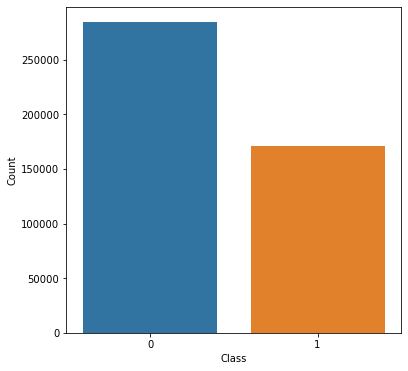

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(y_resampled)
plt.xlabel('Class')
plt.ylabel('Count')

**Applied an upsampling technique to balance minory class in the data. Almost doubled the size of our data especially minority class by generating generic samples**

### 3. Data Modeling

**Convential Rule based system**

In [ ]:
df.groupby('Class').mean()
df['flag_as_fraud'] = np.where(np.logical_and(df['V1'] < -3, df['V3'] < -5), 1, 0)

**Here ran a groupby command on the labels and obtained the mean for each feature, then implemented a rule for stating which cases are flagged as fraud**

In [ ]:
print("Results of flagged fraud cases versus the actual fraud cases:\n")
print(pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Results of flagged fraud cases versus the actual fraud cases:

Flagged Fraud       0     1
Actual Fraud               
0              283089  1226
1                 322   170


**Example using the rule based system**

In [ ]:
a=df.groupby('Class').mean()
a

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,flag_as_fraud
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.004312
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,0.345528


<font color='red'><b>Do you think a rule-based system for catching credit card fraud is a good choice? What are the pros and cons?

In [ ]:
print("recall is {}".format(pd.crosstab(df.Class, df.flag_as_fraud)[1][1]/pd.crosstab(df.Class, df.flag_as_fraud).sum(axis=1)[1]))

recall is 0.34552845528455284


In [ ]:
print("precision is {}".format(pd.crosstab(df.Class, df.flag_as_fraud)[1][1]/pd.crosstab(df.Class, df.flag_as_fraud)[1].sum()))

precision is 0.12177650429799428


<font color='green'><b> No, in this specific dataset, for df['V1'] < -3 and df['V3'] < -5, recall is low, not to mention precision. It is still likely to boost recall if modify the key predictors. </font><br>
<i> Pros
1. It is clear why a transaction would be marked as fraudulent, as the rules are hard-coded
2. The algorithm is functional from Day 1 -- training samples are not needed
3. (no need to pay data scientists or machine learning engineers)
    
<i> Cons
1. It relys on an established fraud pattern
    - What if some frauds are not reported thus never known? 
2. It is slow in response to the change of new strategies by fraudsters
    - What if frausters reverse engineer the rigid fraud detection pattern and divert their efforts? 

Reference: https://nethone.com/post/machine-learning-models-vs-rule-based-systems-in-fraud-prevention <br>
<font color='green'><b> In contrast, ML techniques might have an edge in dynamic variable tracking and real-time insights. 

**Let's look at some more sophisticated machine learning solutions**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y = df.iloc[:,-1].values
X = df.iloc[:, :-1].values
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

In [ ]:
conf_mat = metrics.confusion_matrix(y_true=y_test, y_pred=predicted)
print('\nClassification Report:\n', classification_report(y_test, predicted))
print('\nConfusion matrix:\n', conf_mat)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85019
           1       0.68      0.72      0.70       424

    accuracy                           1.00     85443
   macro avg       0.84      0.86      0.85     85443
weighted avg       1.00      1.00      1.00     85443


Confusion matrix:
 [[84873   146]
 [  120   304]]



Confusion Matrix in depth analysis: 



<AxesSubplot:>

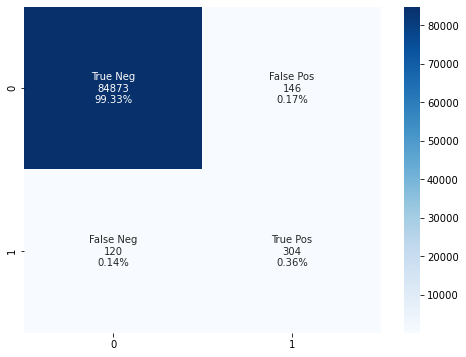

In [ ]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in
                conf_mat.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
plt.figure(figsize=(8,6))
labels = np.asarray(labels).reshape(2,2)
print("\nConfusion Matrix in depth analysis: \n")
sns.heatmap(conf_mat, annot=labels, fmt='', cmap='Blues')

In [ ]:
print("recall is {}".format(int(group_counts[3])/(int(group_counts[2]) + int(group_counts[3]))))

recall is 0.7169811320754716


**Machine learning with improved balance using SMOTE**

In [ ]:
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import SMOTE

resampling = SMOTE(random_state=42, sampling_strategy=0.6)
model = LogisticRegression()

pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
pipeline.fit(X_train, y_train) 
predicted_lr_smote = model.predict(X_test)

In [ ]:
conf_mat_lr_smote = metrics.confusion_matrix(y_true=y_test, y_pred=predicted_lr_smote)
print('\nClassification Report:\n', classification_report(y_test, predicted_lr_smote))
print('\nConfusion matrix:\n', conf_mat_lr_smote)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85019
           1       0.24      1.00      0.39       424

    accuracy                           0.98     85443
   macro avg       0.62      0.99      0.69     85443
weighted avg       1.00      0.98      0.99     85443


Confusion matrix:
 [[83675  1344]
 [    2   422]]



Confusion Matrix in depth analysis for oversampled data: 



<AxesSubplot:>

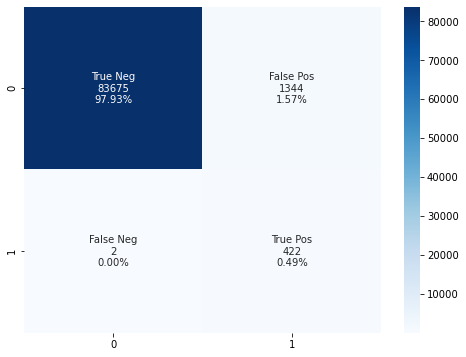

In [ ]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in
                conf_mat_lr_smote.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     conf_mat_lr_smote.flatten()/np.sum(conf_mat_lr_smote)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
plt.figure(figsize=(8,6))
labels = np.asarray(labels).reshape(2,2)
print("\nConfusion Matrix in depth analysis for oversampled data: \n")
sns.heatmap(conf_mat_lr_smote, annot=labels, fmt='', cmap='Blues')

In [ ]:
print("recall is {}".format(int(group_counts[3])/(int(group_counts[2]) + int(group_counts[3]))))

recall is 0.9952830188679245


<font color='red'><b>Compare the Confusion Matrices for the model with SMOTE and model without SMOTE to determine which model will be a better fit for this business problem

Since the success metrics is recall (the higher the better), the model without SMOTE has recall about 0.717 and the model with SMOTE has recall about 0.995. The model with SMOTE outperformed than the one without. 

<font color='red'><b>Once you finanlize if SMOTE or non-SMOTE model is better for your business case requirements, try 2 other models of your choice on the strategy and evaluate them on 2 metrics of your choice that weren't haven't used so far

Use SMOTE. 

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

#### Model 1 - Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)

predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

In [ ]:
conf_mat = metrics.confusion_matrix(y_true=y_test, y_pred=predicted)
print('\nClassification Report:\n', classification_report(y_test, predicted))
print('\nConfusion matrix:\n', conf_mat)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     85368
           1       0.97      0.96      0.97     51104

    accuracy                           0.97    136472
   macro avg       0.97      0.97      0.97    136472
weighted avg       0.97      0.97      0.97    136472


Confusion matrix:
 [[84053  1315]
 [ 2200 48904]]



Confusion Matrix in depth analysis: 



<AxesSubplot:>

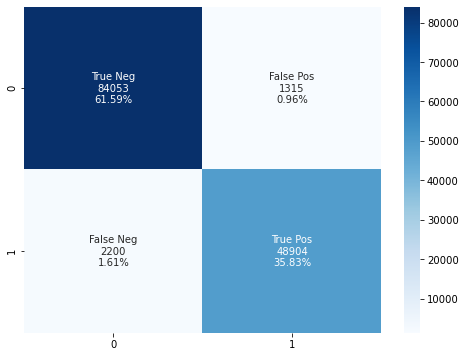

In [ ]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in
                conf_mat.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
plt.figure(figsize=(8,6))
labels = np.asarray(labels).reshape(2,2)
print("\nConfusion Matrix in depth analysis: \n")
sns.heatmap(conf_mat, annot=labels, fmt='', cmap='Blues')

In [ ]:
print("recall is {}".format(int(group_counts[3])/(int(group_counts[2]) + int(group_counts[3]))))

recall is 0.9569505322479649


#### Model 2 - Random Forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)

model = RandomForestClassifier()
model.fit(X_train, y_train)

predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

In [ ]:
conf_mat = metrics.confusion_matrix(y_true=y_test, y_pred=predicted)
print('\nClassification Report:\n', classification_report(y_test, predicted))
print('\nConfusion matrix:\n', conf_mat)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85368
           1       1.00      1.00      1.00     51104

    accuracy                           1.00    136472
   macro avg       1.00      1.00      1.00    136472
weighted avg       1.00      1.00      1.00    136472


Confusion matrix:
 [[85343    25]
 [    0 51104]]



Confusion Matrix in depth analysis: 



<AxesSubplot:>

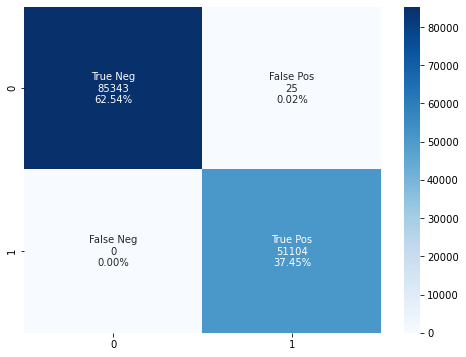

In [ ]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in
                conf_mat.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
plt.figure(figsize=(8,6))
labels = np.asarray(labels).reshape(2,2)
print("\nConfusion Matrix in depth analysis: \n")
sns.heatmap(conf_mat, annot=labels, fmt='', cmap='Blues')

In [ ]:
print("recall is {}".format(int(group_counts[3])/(int(group_counts[2]) + int(group_counts[3]))))

recall is 1.0


<font color='orange'><b>  Overfitting with such a good recall?

In [ ]:
from sklearn.metrics import recall_score
metrics.recall_score(y_test, predicted)

1.0

#### Model 3 - Decision Tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

In [ ]:
conf_mat = metrics.confusion_matrix(y_true=y_test, y_pred=predicted)
print('\nClassification Report:\n', classification_report(y_test, predicted))
print('\nConfusion matrix:\n', conf_mat)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85368
           1       1.00      1.00      1.00     51104

    accuracy                           1.00    136472
   macro avg       1.00      1.00      1.00    136472
weighted avg       1.00      1.00      1.00    136472


Confusion matrix:
 [[85131   237]
 [   91 51013]]



Confusion Matrix in depth analysis: 



<AxesSubplot:>

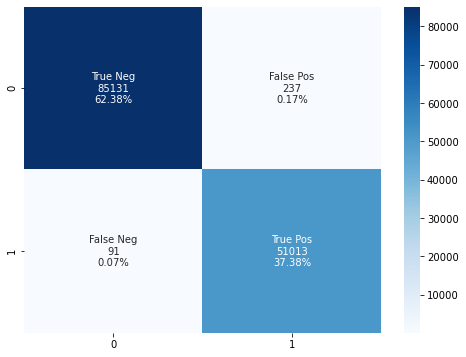

In [ ]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in
                conf_mat.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
plt.figure(figsize=(8,6))
labels = np.asarray(labels).reshape(2,2)
print("\nConfusion Matrix in depth analysis: \n")
sns.heatmap(conf_mat, annot=labels, fmt='', cmap='Blues')

In [ ]:
metrics.recall_score(y_test, predicted)

0.9982193174702567

>1, train: 0.953, test: 0.953
>2, train: 0.960, test: 0.960
>3, train: 0.968, test: 0.968
>4, train: 0.972, test: 0.972
>5, train: 0.975, test: 0.975
>6, train: 0.978, test: 0.978
>7, train: 0.981, test: 0.981
>8, train: 0.985, test: 0.985
>9, train: 0.989, test: 0.989
>10, train: 0.992, test: 0.991
>11, train: 0.994, test: 0.993
>12, train: 0.996, test: 0.994
>13, train: 0.997, test: 0.995
>14, train: 0.998, test: 0.996
>15, train: 0.999, test: 0.997
>16, train: 0.999, test: 0.997
>17, train: 0.999, test: 0.997
>18, train: 0.999, test: 0.997
>19, train: 1.000, test: 0.997
>20, train: 1.000, test: 0.997


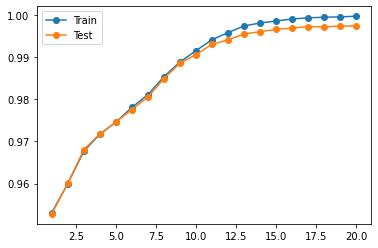

In [ ]:
from sklearn.metrics import accuracy_score
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

<font color='red'><b>Pick your best performing model and explain it using success metrics <br>

Best performing model is random forest with a recall score of 0.9999608641202254. 

<font color='green'><b>Following are theoretical questions:

<font color='red'><b>For your business case which is more important - precision or recall? Why? <br>

Formulas: 
- $\text{Precision} = \frac{\text{True Frauds}}{\text{True Frauds} + \text{False Frauds}}$ <br>
- $\text{Recall} = \frac{\text{True Frauds}}{\text{True Frauds} + \text{False Non-frauds}}$ <br>

The question is the same as asking - is it more important to precisely identify transations that are likely to be fraud or non-fraud with limited number of flags, or is it more important to flag all frauds there could be and maybe include a handful of non-frauds? 

Recall is more important. It is vital to eliminate false non-frauds (false negatives) and identify as many frauds as possible can, even at the cost of flagging more transactions and triggering false positives. <br>

Reference: https://medium.com/@shrutisaxena0617/precision-vs-recall-386cf9f89488

<font color='red'><b>For your business case which is more important - accuracy or generalization? Why?

Generalization. It is more important to detect fraud long-term.

<font color='red'><b>Can you tie accuracies to business value (financial value)?

<font color='red'><b>Are these accuracies good enough and give the business value or the ROI they estimated? If not, what else will you do to improve accuracies to get higher business value?

<font color='red'><b>What other data set can you use for this project?

Current fraud strategies

Will need the actual data, which should ideally include at least
- Transaction details
    - Account number
    - Transaction ID
    - Authorization code
    - Amount
    - Timestamp
    - Duration
    - Description
    - Client IP address
    - Fraud flag
- Merchant information
    - Company name
    - Address
    - Order ID
    - Price
    - Quantity
- Customer demographics
    - Address
    - Zip
    - Number
    - Email
    - Gender
    - Age
    - Income

<font color='red'><b>What other pre processing or processing can be done to improve the model?

To start with, restore PCA to the original variables. 

<font color='red'><b>What other advanced algorithms would you want to try?

- Linear Discriminant Analysis
- K Nearest Neighbors (KNN)
- Support Vector Classifier (long run time)
- XGBoost Classifier

Reference: https://towardsdatascience.com/detecting-credit-card-fraud-using-machine-learning-a3d83423d3b8